In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2



Посмотрите формат таблиц

In [6]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [7]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

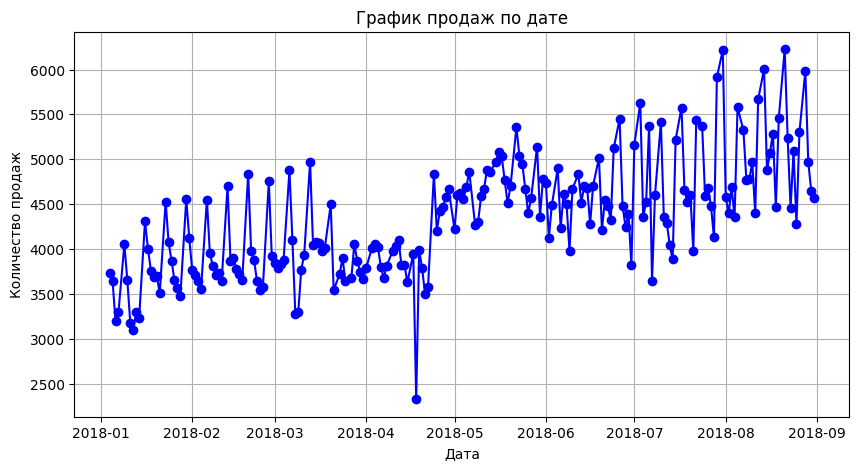

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.title('График продаж по дате')
plt.grid()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

Наблюдается высокая степень изменчивости продаж от месяца к месяцу.

За весь период не прослеживается четко выраженная тенденция к росту или снижению продаж.
Визуально можно заметить некоторые сезонные колебания. Например, в начале года (январь-февраль) наблюдается снижение продаж, а затем следует период роста.
На графике присутствуют отдельные месяцы с аномально высокими или низкими показателями продаж.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [13]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

outliers_df = df[df['Количество'] > (Q3 + 1.5 * IQR)]

max_outlier = outliers_df[outliers_df['Количество'] == outliers_df['Количество'].max()]

print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [14]:
df['Дата'] = pd.to_datetime(df['Дата'])

filtered_df = df[
    (df['Склад'] == 3) &
    (df['Дата'].dt.month.isin([6, 7, 8])) &
    (df['Дата'].dt.weekday == 2)
]

top_product = (
    filtered_df.groupby('Номенклатура')['Количество']
    .sum()
    .idxmax()
)

print("Топовый товар по продажам по средам за июнь, июль, август на складе 3:", top_product)

Топовый товар по продажам по средам за июнь, июль, август на складе 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

Местное время в Астане    datetime64[ns]
T                                float64
dtype: object


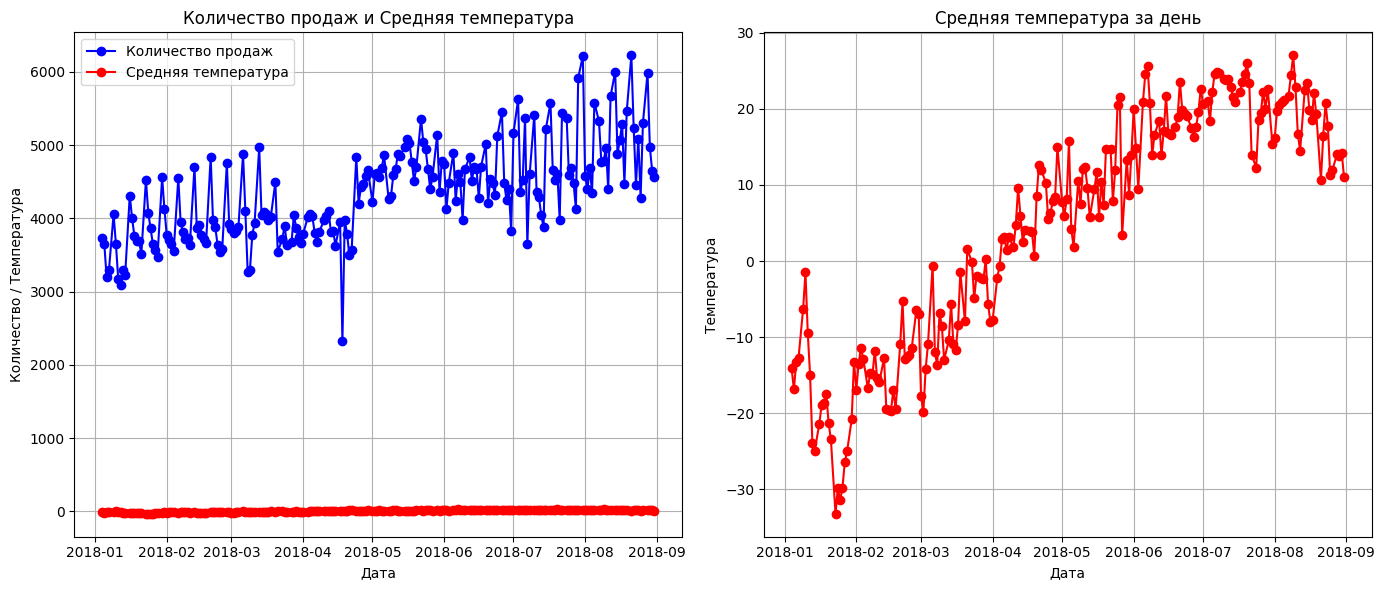

In [22]:
temperature_df = pd.read_excel('/content/weather-merge.xls')

temperature_df['Местное время в Астане'] = pd.to_datetime(temperature_df['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce')

print(temperature_df.dtypes)

temperature_df['Дата'] = temperature_df['Местное время в Астане'].dt.date
average_temp_df = temperature_df.groupby('Дата')['T'].mean().reset_index()
average_temp_df.rename(columns={'T': 'Средняя температура'}, inplace=True)


grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date

merged_df = pd.merge(grouped_df, average_temp_df, on='Дата')

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(merged_df['Дата'], merged_df['Количество'], marker='o', linestyle='-', color='b', label='Количество продаж')
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], marker='o', linestyle='-', color='r', label='Средняя температура')
plt.xlabel('Дата')
plt.ylabel('Количество / Температура')
plt.title('Количество продаж и Средняя температура')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], marker='o', linestyle='-', color='r')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.title('Средняя температура за день')
plt.grid()

plt.tight_layout()
plt.show()